# **LetsGrowMore**

## **Beginner Level Task**

## **TASK 1** : Iris Flowers Classification

### Objecetive : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Imorting Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

### Loading Dataset

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/Dimple79/LGMVIP-DataScience/main/Task%201/1.%20Iris%20Flower%20Classification%20ML%20Project/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Inspecting Data

In [17]:
df.shape

(150, 6)

- The data consist of 150 rows and 6 attributes

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


- There are 4 float, 1 integer and 1 Object column
-  There are no null values

In [19]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- No null values

In [20]:
#statistucal summary 
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


- It may have some outliers, to check we use box plot in EDA part 

In [21]:
df.drop('Id',axis=1, inplace=True)
df.shape

(150, 5)

- Removed Id column as it is of no use in predicting species of flower

### Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


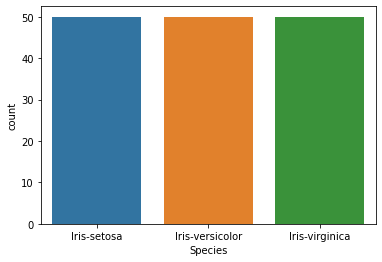

In [22]:
sns.countplot(df['Species'])

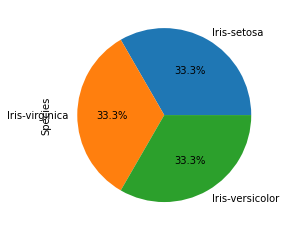

In [23]:
df['Species'].value_counts().plot(kind='pie', autopct="%.1f%%")

- This indicates we have balanced dataset

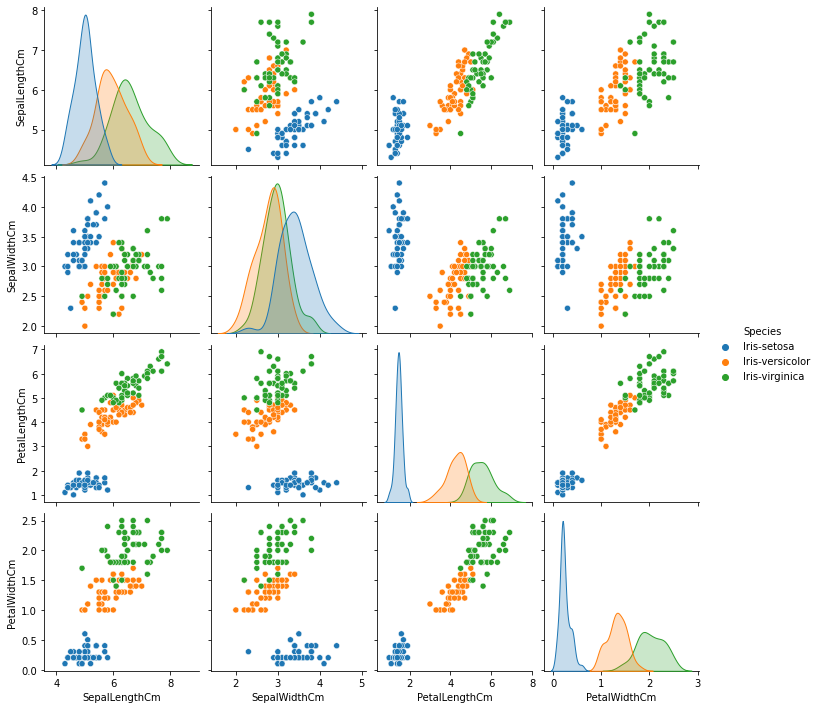

In [24]:
sns.pairplot(df, hue='Species');

- Setosa is linearly seperable but versicolor and virginica are overlapping 

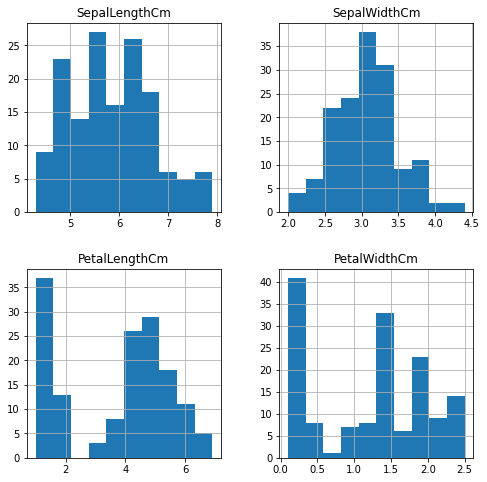

In [25]:
df.hist(figsize=(8,8));

- Petal Length and Petal width are bimodal. 
- Sepal Length and Sepal width are unimodal and seems to be normally distributed.

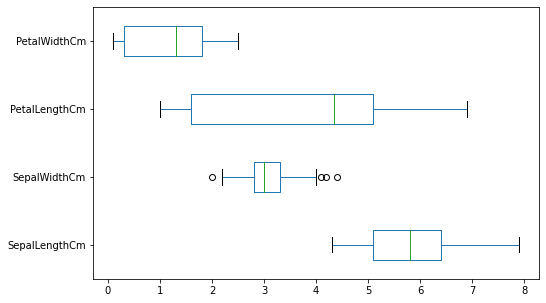

In [26]:
df.plot(kind='box',figsize=(8,5), vert=False);

- Sepalwidth seems to have outliers 

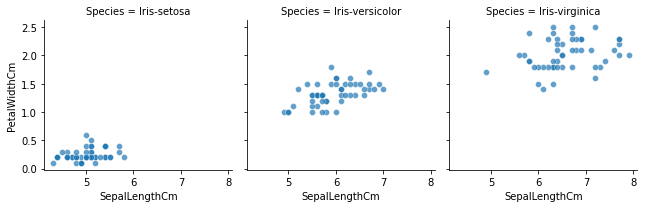

In [27]:
grid = sns.FacetGrid(df, col="Species");
grid.map(sns.scatterplot, "SepalLengthCm","PetalWidthCm", alpha=.7);
grid.add_legend()

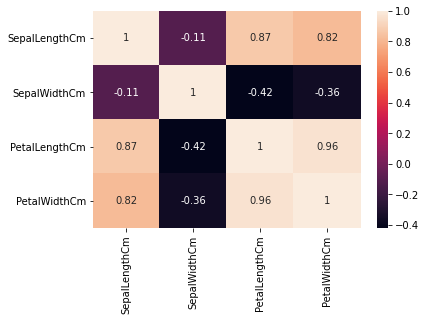

In [28]:
sns.heatmap(df.corr(), annot=True)

- The data seems to highly correleated with each other 

### Spliting Data

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
train , test = train_test_split(df,test_size=0.2,random_state=0)
print('shape of training data : ', train.shape)
print('shape of testing data', test.shape)

shape of training data :  (120, 5)
shape of testing data (30, 5)


In [31]:
train_x = train.drop(columns=['Species'],axis=1)
train_y = train['Species']

test_x = test.drop(columns=['Species'],axis=1)
test_y = test['Species']

<h2 align='center'> Logistic Regression </h2>

In [32]:
model = LogisticRegression()
model.fit(train_x,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction

In [33]:
predict = model.predict(test_x)
print('Predicted Values on Test Data',predict)

Predicted Values on Test Data ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [34]:
y_test_pred = model.predict(test_x)
y_train_pred = model.predict(train_x)

In [35]:
print("Training Accuracy: ", accuracy_score(train_y, y_train_pred))
print("Test Accuracy: ", accuracy_score(test_y, y_test_pred))

Training Accuracy:  0.9666666666666667
Test Accuracy:  1.0


<h2 align='center'> K-Means </h2>

- Finding the optimum number of clusters for k-means classification

In [36]:
x = df.iloc[:,[0,1,2,3]].values

wcss = [] # Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### Plotting the results
- Visualize the result and check the optimal number of cluster using Elbow method

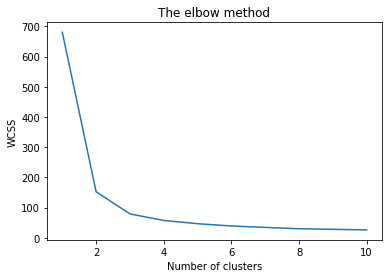

In [37]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

- The optimum clusters is where the elbow occurs ie at 3.

### Applying kmeans 

In [38]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualising the clusters

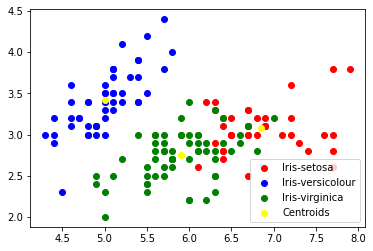

In [39]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'yellow', label = 'Centroids')
plt.legend()